# Recognizing handwritten digits with an artificial neural network 

We will develop and train an artificial neural network to recognize handwritten digits using the KERAS API in Python in combination with tensorflow, which is an open source platform for machine learning. 

The MNIST database of handwritten digits is described here: http://yann.lecun.com/exdb/mnist/. It provides a training set of 60,000 examples and a test set of 10,000 examples. The images are normalized and of fixed size. Many methods have already been tested on this database: what will be the error rate of your neural network? 

Documentation about KERAS can be found here: https://keras.io

## Installation 

We first create a Python virtual environment to install KERAS, tensorflow, and their dependencies. 

### - On a local mac/linux computer

````
brew update
brew install python3

pip3 install virtualenv
pip3 install −−user virtualenvwrapper
export WORKON_HOME=./
source ∼/.local/bin/virtualenvwrapper.sh -p $WORKON_HOME
mkvirtualenv kerasenv -p python3
workon kerasenv

pip3 install jupyterlab
pip3 install numpy scipy 
pip3 install scikit-learn
pip3 install matplotlib 
pip3 install tensorflow
pip3 install keras==2.3.1
pip3 install seaborn
````

### - In a virtual environment on astromaster

````
python3 -m venv keras3 # To create a virtual environment keras3 with python3
source keras3/bin/activate # To activate the virtual environment keras3

pip3 install wheel
pip3 install numpy scipy 
pip3 install matplotlib 
pip3 install scikit-learn
pip3 install --upgrade tensorflow
pip3 install keras==2.3.1
pip3 install jupyterlab
pip3 install seaborn
````

## Open a Jupyter Notebook

### - On your local machine:

````
jupyter notebook
````

### - On astromaster

Launch Jupyter Notebook on astromaster and access it from a remote machine using SSH, with a SSH tunnel:

(1) On astromaster (change port number if needed)

````
jupyter notebook --no-browser --port=7777
````

(2) On your local machine (change username, requires a VPN to access astromaster)

````
ssh -L 7777:localhost:7777 jfreundlich@astromaster
````

(3) On your local brower, navigate to http://localhost:7777/
Note: you will need the token number resulting from step (1)


### - Create a new Python notebook: 

Create a new Python notebook from the menu at the top-right: 

<img src="newnotebook.png">


## Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load training data

In [2]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check data shape: 

In [3]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Check some examples: 

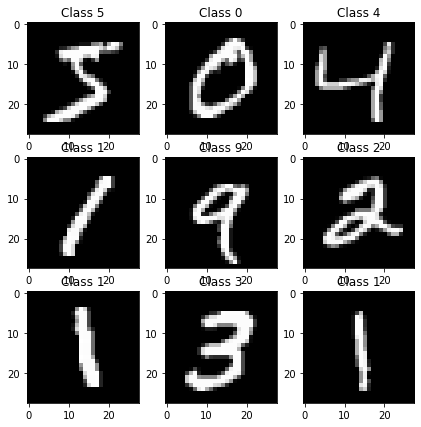

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

Check min, max:

In [5]:
print("X_train min=",X_train.min(),",max=",X_train.max())
print("y_train min=",y_train.min(),",max=",y_train.max())

X_train min= 0 ,max= 255
y_train min= 0 ,max= 9


## Format the data for training

The neural network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255].

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
print("Training matrix shape", Y_train.shape)
print("Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 10)
Testing matrix shape (10000, 10)


## Building the neural network

We define a sequential model with three layers incrementally. 

In [16]:
model = Sequential()
model.add(Dense(5, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
#model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(5))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

Display the contents of the model:  

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 3925      
                                                                 
 activation_6 (Activation)   (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 activation_7 (Activation)   (None, 5)                 0         
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-traina

Compilation of the model: 

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

Other possible loss functions include: 

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.compile(loss='Poisson', optimizer='adam')
    
    def my_loss_fn(y_true, y_pred):
      squared_difference = (y_true - y_pred)**2
      return np.mean(squared_difference)   
     
    model.compile(loss='my_loss_fn', optimizer='adam')

etc...

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [20]:
history=model.fit(X_train, Y_train,
          batch_size=100, epochs=10,
          validation_data=(X_test, Y_test))

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 1.4288 - val_loss: 0.8679
Epoch 2/10
600/600 [==============================] - 1s 992us/step - loss: 0.7294 - val_loss: 0.6292
Epoch 3/10
600/600 [==============================] - 1s 995us/step - loss: 0.5971 - val_loss: 0.5454
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.5309 - val_loss: 0.5017
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4936 - val_loss: 0.4831
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4722 - val_loss: 0.4673
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4582 - val_loss: 0.4560
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4478 - val_loss: 0.4539
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4395 - val_loss: 0.4467
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4335 - val_loss: 0.

## Evaluate performance 

In [21]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict=model.predict(X_test) 
Ytest_predicted=np.argmax(predict,axis=1)
Y_test_pred = np_utils.to_categorical(Ytest_predicted, nb_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(Ytest_predicted == y_test)[0]
incorrect_indices = np.nonzero(Ytest_predicted != y_test)[0]

### Plot correctly or incorrectly classified examples

### Calculate the global accuracy and the error rate

In [ ]:
### 

### ROC curve

In [20]:
from sklearn.metrics import roc_curve,auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


### Precision-Recall curve

In [23]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(nb_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], Y_test_pred[:, i])


### Confusion matrix

In [1]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#The input to confusion_matrix must be an array of int not one hot encodings
matrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1))

NameError: name 'Y_test' is not defined